# Lab | Data Aggregation and Filtering

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by first performing data cleaning, formatting, and structuring.

1. Create a new DataFrame that only includes customers who have a total_claim_amount greater than $1,000 and have a response of "Yes" to the last marketing campaign.

2. Using the original Dataframe, analyze the average total_claim_amount by each policy type and gender for customers who have responded "Yes" to the last marketing campaign. Write your conclusions.

3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

4. Find the maximum, minimum, and median customer lifetime value by education level and gender. Write your conclusions.

## Bonus

5. The marketing team wants to analyze the number of policies sold by state and month. Present the data in a table where the months are arranged as columns and the states are arranged as rows.

6.  Display a new DataFrame that contains the number of policies sold by month, by state, for the top 3 states with the highest number of policies sold.

*Hint:*
- *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.*
- *Next, you will select the top 3 states with the highest number of policies sold.*
- *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*

7. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.

Hint: You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

External Resources for Data Filtering: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

In [10]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv')
new_df = df[(df['Total Claim Amount'] > 1000) & (df['Response'] == 'Yes')]
df.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


Average Total Claim Amount by Policy Type and Gender:
Gender                   F           M
Policy Type                           
Corporate Auto  433.738499  408.582459
Personal Auto   452.965929  457.010178
Special Auto    453.280164  429.527942


<Figure size 1200x600 with 0 Axes>

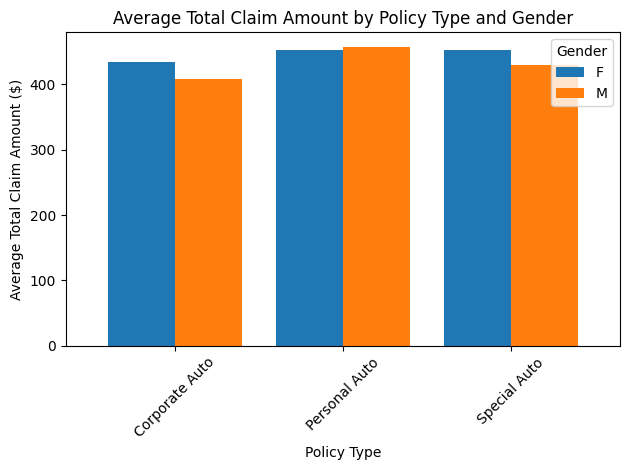

In [20]:
df_yes = df[df['Response'] == 'Yes']
avg_claims = df_yes.groupby(['Policy Type', 'Gender'])['Total Claim Amount'].mean().unstack()

# Display the results
print("Average Total Claim Amount by Policy Type and Gender:")
print(avg_claims)

# Visualize the results
plt.figure(figsize=(12, 6))
avg_claims.plot(kind='bar', width=0.8)
plt.title('Average Total Claim Amount by Policy Type and Gender')
plt.xlabel('Policy Type')
plt.ylabel('Average Total Claim Amount ($)')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Las pólizas de Auto Especial, especialmente para mujeres, pueden requerir una evaluación de riesgos más cuidadosa debido a sus montos de reclamo más altos.

Las pólizas de Auto Corporativo, a pesar de lo que se podría asumir, parecen tener un perfil de riesgo más bajo en términos de montos de reclamo.

In [15]:
state_counts = df['State'].value_counts()
states_over_500 = state_counts[state_counts > 500]
print("States with more than 500 customers:")
print(states_over_500)

States with more than 500 customers:
State
California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
Name: count, dtype: int64


Hay una clara concentración de clientes en el oeste de Estados Unidos, y California tiene con diferencia el mayor número de clientes.
Esto sugiere que California es un mercado crucial para la compañía de seguros.

In [17]:
clv_stats = df.groupby(['Education', 'Gender'])['Customer Lifetime Value'].agg(['max', 'min', 'median'])
print(clv_stats)

                                     max          min       median
Education            Gender                                       
Bachelor             F       73225.95652  1904.000852  5640.505303
                     M       67907.27050  1898.007675  5548.031892
College              F       61850.18803  1898.683686  5623.611187
                     M       61134.68307  1918.119700  6005.847375
Doctor               F       44856.11397  2395.570000  5332.462694
                     M       32677.34284  2267.604038  5577.669457
High School or Below F       55277.44589  2144.921535  6039.553187
                     M       83325.38119  1940.981221  6286.731006
Master               F       51016.06704  2417.777032  5729.855012
                     M       50568.25912  2272.307310  5579.099207
